In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
data = pd.read_csv('bus.csv')

In [93]:
def format_time(time):
    return datetime.fromisoformat(time[:-1])

In [94]:
def subtract_time(observed, scheduled):
    return (observed - scheduled).total_seconds() / 60

In [118]:
#missing data
missing = data.id.count() - data.observed_visit_time.count() 

#dropping rows where observed_visit_time data is missing
observed_times = data.dropna(subset = ["observed_visit_time", "scheduled_visit_time"]) 
observed_times_copy = observed_times.copy()
observed_times_copy['observed_visit_time'] = observed_times_copy['observed_visit_time'].map(format_time)
observed_times_copy['scheduled_visit_time'] = observed_times_copy['scheduled_visit_time'].map(format_time)

observed_times_formatted = observed_times_copy['observed_visit_time']
observed_times_formatted = observed_times_formatted.reset_index(drop=True)

scheduled_times_formatted = observed_times_copy['scheduled_visit_time']
scheduled_times_formatted = scheduled_times_formatted.reset_index(drop=True)

difference_times = np.empty(0)

for number in range(0, observed_times_formatted.shape[0] - 1):
    time = subtract_time(observed_times_formatted[number], scheduled_times_formatted[number])
    difference_times = np.append(difference_times, time)

print(difference_times.mean())
print(np.quantile(difference_times, 0.25))
print(np.quantile(difference_times, 0.75))



4.3801552375437725
0.6577666666666667
6.651983333333334


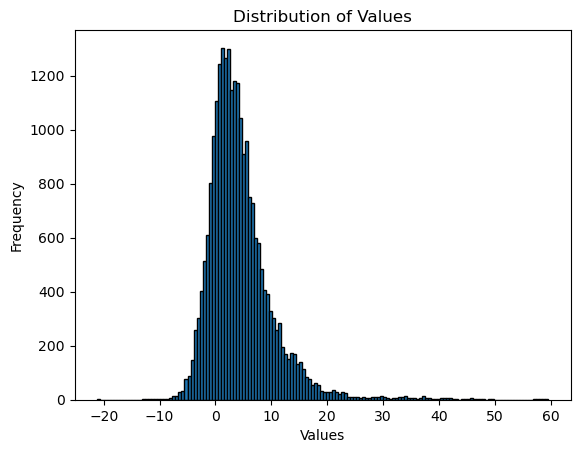

In [113]:
# Create histogram plot
plt.hist(difference_times, bins=150, edgecolor='black')

# Set plot title and labels
plt.title('Distribution of Values')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display plot
plt.show()